In [2]:
import cv2
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [3]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2516, done.
remote: Total 2516 (delta 0), reused 0 (delta 0), pack-reused 2516 (from 1)
Receiving objects: 100% (2516/2516), 8.20 MiB | 12.37 MiB/s, done.
Resolving deltas: 100% (1575/1575), done.


In [4]:
%cd pytorch-CycleGAN-and-pix2pix/

/content/pytorch-CycleGAN-and-pix2pix


In [5]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 24.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408196 sha256=ad134b6de6c6544047ac2510ad0b290bf9eadfe65f9f797c71d2e6e9f9c0ea3f
  Stored in directory: /root/.cache/pip/wheels/fa/a4/bb/2be445c295d88a74f9c0a4232f04860ca489a5c7c57eb959d9
Successfully built visdom


## Troca de domínio (cavalo por zebra)

Existe uma variedade maior de modelos pré-treinados:

> `[apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower]`

In [6]:
nome_modelo = "horse2zebra"
diretorio_modelo = "./checkpoints/{}_pretreinado/".format(nome_modelo)
diretorio_modelo

'./checkpoints/horse2zebra_pretreinado/'

In [7]:
!mkdir -p {diretorio_modelo}

In [8]:
url = "http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/{}.pth".format(nome_modelo)

In [9]:
!wget -N {url}

--2025-01-17 14:44:52--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/horse2zebra.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘horse2zebra.pth’

horse2zebra.pth     100%[===================>]  43.46M  61.2MB/s    in 0.7s    

2025-01-17 14:44:52 (61.2 MB/s) - ‘horse2zebra.pth’ saved [45575747/45575747]



In [10]:
!mv {nome_modelo}.pth {diretorio_modelo}latest_net_G.pth

In [11]:
!mkdir -p imagens/cavalos

### Testando modelo

In [13]:
!python test.py --dataroot imagens/cavalos --name {nome_modelo}_pretreinado --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: imagens/cavalos               	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

In [14]:
diretorio_resultados = "./results/{}_pretreinado/test_latest/images/".format(nome_modelo)

In [15]:
imagem_exemplo = "cavalo"

### Resultado

#### imagem gerada

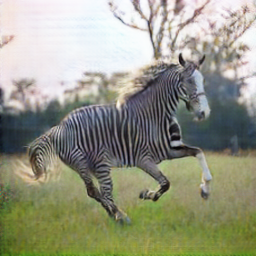

In [17]:
img_resultado = cv2.imread(diretorio_resultados + "{}_fake.png".format(imagem_exemplo))
cv2_imshow(img_resultado)

#### Imagem real

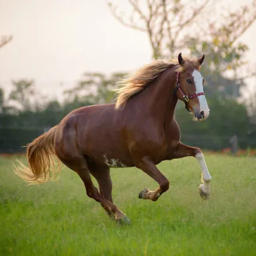

In [18]:
img_resultado = cv2.imread(diretorio_resultados + "{}_real.png".format(imagem_exemplo))
cv2_imshow(img_resultado)

In [19]:
def exibir_resultado(nome_img, diretorio):
  img_entrada = cv2.imread(diretorio + nome_img + "_real.png")
  img_resultado = cv2.imread(diretorio + nome_img + "_fake.png")

  imgs = [img_entrada, img_resultado]
  titulo = ["Entrada (Original)", "Saída (Gerada)"]

  plt.figure(figsize=(10, 6))
  for i in range(len(imgs)):
    plt.subplot(1, 2, i+1)
    plt.title(titulo[i])
    plt.axis("off")
    plt.imshow(cv2.cvtColor(imgs[i], cv2.COLOR_BGR2RGB))
  plt.show()

In [20]:
dir_imgs = "imagens/cavalos"
lista_imgs = [os.path.splitext(f)[0] for f in os.listdir(dir_imgs) if f.endswith(".jpg")]
lista_imgs

['cavalo03', 'cavalo02', 'cavalo']


Resultado para imagem cavalo03:


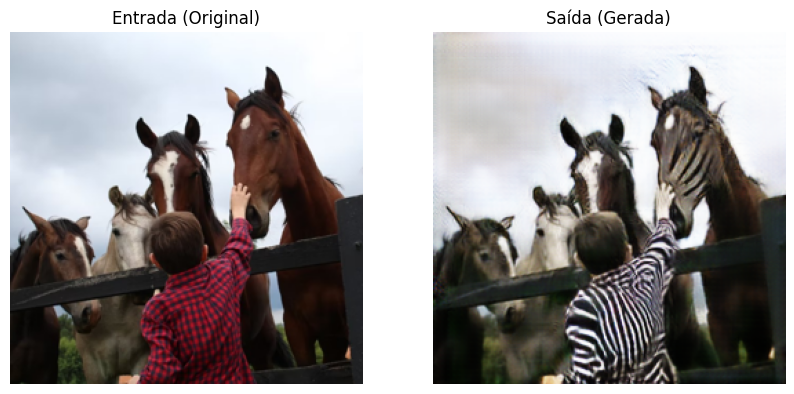


Resultado para imagem cavalo02:


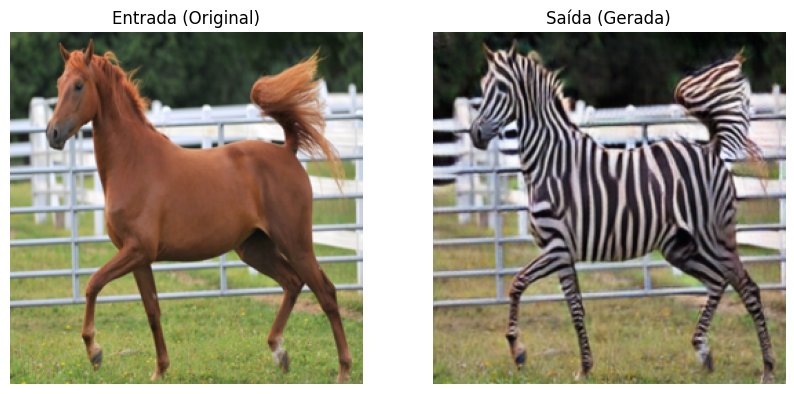


Resultado para imagem cavalo:


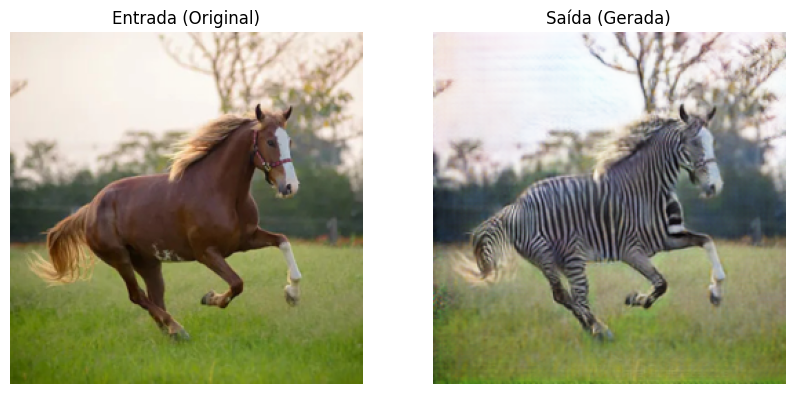

In [21]:
for img in lista_imgs:
  print("\nResultado para imagem {}:".format(img))
  exibir_resultado(img, diretorio_resultados)

# Foto para pintura (Transferência de estilo)

### Estilo Monet

In [22]:
nome_modelo = "style_vangogh"
diretorio_modelo = "./checkpoints/{}_pretreinado/".format(nome_modelo)
!mkdir -p {diretorio_modelo}
url_modelo = "http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/{}.pth".format(nome_modelo)
!wget -N {url_modelo}
!mv {nome_modelo}.pth {diretorio_modelo}latest_net_G.pth

--2025-01-17 14:56:31--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/style_vangogh.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘style_vangogh.pth’

style_vangogh.pth   100%[===================>]  43.46M  51.2MB/s    in 0.8s    

2025-01-17 14:56:32 (51.2 MB/s) - ‘style_vangogh.pth’ saved [45575747/45575747]



In [27]:
!python test.py --dataroot imagens/ --name {nome_modelo}_pretreinado --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: imagens/                      	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

In [28]:
diretorio_resultados = "./results/{}_pretreinado/test_latest/images/".format(nome_modelo)
dir_imgs = "imagens/"
lista_imgs = [os.path.splitext(f)[0] for f in os.listdir(dir_imgs) if f.endswith(".jpg")]

for img in lista_imgs:
  print("\nResultado para imagem {}:".format(img))
  exibir_resultado(img, diretorio_resultados)

Output hidden; open in https://colab.research.google.com to view.

## Estilo Van Gogh

In [29]:
nome_modelo = "style_cezanne"
diretorio_modelo = "./checkpoints/{}_pretreinado/".format(nome_modelo)
!mkdir -p {diretorio_modelo}
url_modelo = "http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/{}.pth".format(nome_modelo)
!wget -N {url_modelo}
!mv {nome_modelo}.pth {diretorio_modelo}latest_net_G.pth

--2025-01-17 15:04:26--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/style_cezanne.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘style_cezanne.pth’

style_cezanne.pth   100%[===================>]  43.46M  61.3MB/s    in 0.7s    

2025-01-17 15:04:27 (61.3 MB/s) - ‘style_cezanne.pth’ saved [45575747/45575747]



In [30]:
!python test.py --dataroot imagens/ --name {nome_modelo}_pretreinado --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: imagens/                      	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

In [31]:
diretorio_resultados = "./results/{}_pretreinado/test_latest/images/".format(nome_modelo)
dir_imgs = "imagens/"
lista_imgs = [os.path.splitext(f)[0] for f in os.listdir(dir_imgs) if f.endswith(".jpg")]

for img in lista_imgs:
  print("\nResultado para imagem {}:".format(img))
  exibir_resultado(img, diretorio_resultados)

Output hidden; open in https://colab.research.google.com to view.

## Estilo Ujiyo-e

In [32]:
nome_modelo = "style_ukiyoe"
diretorio_modelo = "./checkpoints/{}_pretreinado/".format(nome_modelo)
!mkdir -p {diretorio_modelo}
url_modelo = "http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/{}.pth".format(nome_modelo)
!wget -N {url_modelo}
!mv {nome_modelo}.pth {diretorio_modelo}latest_net_G.pth

--2025-01-17 15:07:21--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/style_ukiyoe.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘style_ukiyoe.pth’

style_ukiyoe.pth    100%[===================>]  43.46M  62.2MB/s    in 0.7s    

2025-01-17 15:07:22 (62.2 MB/s) - ‘style_ukiyoe.pth’ saved [45575747/45575747]



In [33]:
!python test.py --dataroot imagens/ --name {nome_modelo}_pretreinado --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: imagens/                      	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

In [34]:
diretorio_resultados = "./results/{}_pretreinado/test_latest/images/".format(nome_modelo)
dir_imgs = "imagens/"
lista_imgs = [os.path.splitext(f)[0] for f in os.listdir(dir_imgs) if f.endswith(".jpg")]

for img in lista_imgs:
  print("\nResultado para imagem {}:".format(img))
  exibir_resultado(img, diretorio_resultados)

Output hidden; open in https://colab.research.google.com to view.